<a href="https://colab.research.google.com/github/vynard/vynard/blob/main/cs4783_hw1_vyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp
from math import floor, sqrt

np.set_printoptions(threshold=6)

In [71]:
class myNode:
  def __init__(self, value, left=None, right=None, parent=None):
    self.value = value
    self.left = left
    self.right = right
    self.parent = parent

  def right_child(self):
    return self.right

In [73]:
#problem 1 start
def eucli_distance(v1: np.array, v2: np.array):
  return np.linalg.norm(v2-v1)

class KDTree:
  def __init__(self, matrix: np.array):
    # matrix should be a numpy array where each row is a data element
    # and each column is a feature. This operation should recursively
    # split the data along the median of each feature vector in turn.
    self.matrix = matrix
    self.root = self.build(matrix, 0)

  def build(self, data: np.array, depth, parent=None):
    direction = depth%2
    if (data.size==0):
      return None

    data_sorted = data[data[:,direction].argsort()]
    median = floor((data_sorted[:,direction].size)/2)

    our_node = myNode(data_sorted[median,:], parent=parent)
    our_node.left = self.build(data[:median,:],depth+1, our_node)
    our_node.right = self.build(data[median+1:,:],depth+1, our_node)

    return our_node


  def find_nearest(self, vector):
    # vector is a numpy array with a single row representing a single
    # data element. This method should traverse the tree to a leaf,
    # then search enough of the tree to guarantee finding the nearest
    # neighbor. This neighbor vector should be returned.
    depth = 0
    direction = 0
    node = self.root

    #goes down the tree
    while(node.left != None and node.right !=None):
      if (vector[direction]<node.value[direction]):
        node = node.left
      else:
        node = node.right
      depth+=1
      direction = depth%2

    d = depth
    min_distance = eucli_distance(vector, node.value)
    min_vector = node.value

    #goes up the tree checking the distance of each important to check value
    while(depth>0):
      flag = 0
      #d is the starting point
      if(depth == d):
        flag = 1

      node = node.parent
      depth-=1
      direction = depth%2
      distance = eucli_distance(vector, node.value)
      if(distance<min_distance):
        min_distance = distance
        min_vector = node.value
        flag = 1


      #if the min distance is closer to a new node we need to check its children, also need to check the other child of the starting node's parent
      if(flag==1):
        distance1 = eucli_distance(vector, node.value)
        distance2 = eucli_distance(vector, node.value)
        if(distance1<min_distance):
          min_distance = distance1
          min_vector = node.left.value
        if(distance2<min_distance):
          min_distance = distance2
          min_vector = node.right.value

    return min_vector

#problem 1 end

In [74]:
#test problem 1
mean_11 = [0,0]
cov_11 = [[2, 0], [0, 10]]
mean_12 = [-3, 8]
cov_12 = [[8, 0],[0, 3]]

x_11 = np.random.multivariate_normal(mean_11, cov_11, 5000) #first distribution of points
x_12 = np.random.multivariate_normal(mean_12, cov_12, 5000) #second distribution of points

X5 = np.zeros((10000,2))
y5 = np.zeros(10000)
np.concatenate((x_11,x_12), out=X5) #X is equal to all elements of x_1 followed by all elements of x_2
y5[5000:10000]=1 #this lines up with the ith element of y being 0 if the data is from x_1 or 1 if from x_2

mk = np.random.choice((0,1), 10000, True, (.85, .15)) #roughly 85% of our data will be used for training and 15% for testing
mk_1 = (mk==0)
mk_2 = (mk==1)

training_X5 = X5[mk_1]
training_y5 = y5[mk_1]
test_X5 = X5[mk_2]
test_y5 = y5[mk_2]


In [75]:
ourTree5 = KDTree(training_X5)

In [76]:
y_pred_5 = np.zeros(test_y5.size)
for i in range(y_pred_5.size):
  x_pred_5 = ourTree5.find_nearest(test_X5[i])
  index = np.where(training_X5[:]==x_pred_5)[0][0]
  y_pred_5[i] = training_y5[index]

correct9 = (test_y5==y_pred_5)
accuracy_2 = y_pred_5[correct9].size/y_pred_5.size
print("Our classifier is " + str(accuracy_2*100) + "% accurate")
#accuracy leaves a lot to be desired, but it seems to be working
#end of problem 1 testing

Our classifier is 56.62162162162162% accurate


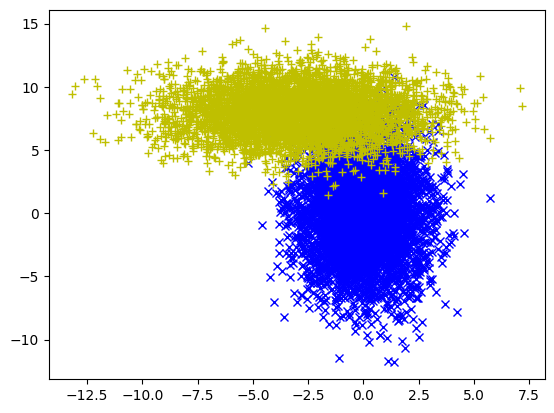

In [77]:
#problem 2 start
mean_1 = [0,0]
cov_1 = [[2, 0], [0, 10]]
mean_2 = [-3, 8]
cov_2 = [[8, 0],[0, 3]]

x_1 = np.random.multivariate_normal(mean_1, cov_1, 5000) #first distribution of points
x_2 = np.random.multivariate_normal(mean_2, cov_2, 5000) #second distribution of points

plt.plot(x_1[:,0], x_1[:,1], "bx")
plt.plot(x_2[:,0], x_2[:,1], "y+")
plt.show()

In [78]:
X = np.zeros((10000,2))
y = np.zeros(10000)
np.concatenate((x_1,x_2), out=X) #X is equal to all elements of x_1 followed by all elements of x_2
y[5000:10000]=1 #this lines up with the ith element of y being 0 if the data is from x_1 or 1 if from x_2

mk = np.random.choice((0,1), 10000, True, (.85, .15)) #roughly 85% of our data will be used for training and 15% for testing
mk_1 = (mk==0)
mk_2 = (mk==1)

training_X = X[mk_1]
training_y = y[mk_1]
test_X = X[mk_2]
test_y = y[mk_2]
#problem 2 end

In [79]:
#problem 3 start
inverse = np.linalg.inv(training_X.T.dot(training_X))
times_transpose = inverse.dot(training_X.T)

beta = times_transpose.dot(training_y)

mk = (test_X.dot(beta)>=.5)
y_pred = np.zeros(test_y.size)
y_pred[mk.T] = 1 #in the second group if xBeta>=.5

correct = (test_y==y_pred)
accuracy = y_pred[correct].size/y_pred.size
print("Our classifier is " + str(accuracy*100) + "% accurate")

Our classifier is 94.8905109489051% accurate


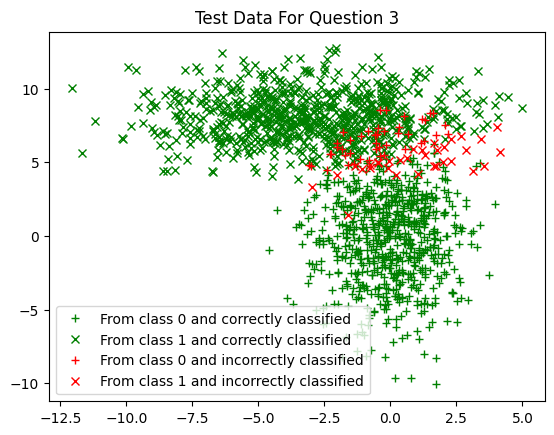

In [80]:
is_0 = (test_y==0)
is_1 = (test_y==1)
is_true = (test_y==y_pred)
is_false = (test_y!=y_pred)

mk_1 = np.logical_and(is_0, is_true)
mk_2 = np.logical_and(is_1, is_true)
mk_3 = np.logical_and(is_0, is_false)
mk_4 = np.logical_and(is_1, is_false)

x_from_0_correct = test_X[mk_1]
x_from_1_correct = test_X[mk_2]
x_from_0_incorrect = test_X[mk_3]
x_from_1_incorrect = test_X[mk_4]

plt.plot(x_from_0_correct.T[0], x_from_0_correct.T[1], "g+", label="From class 0 and correctly classified")
plt.plot(x_from_1_correct.T[0], x_from_1_correct.T[1], "gx", label="From class 1 and correctly classified")
plt.plot(x_from_0_incorrect.T[0], x_from_0_incorrect.T[1], "r+", label="From class 0 and incorrectly classified")
plt.plot(x_from_1_incorrect.T[0], x_from_1_incorrect.T[1], "rx", label="From class 1 and incorrectly classified")
plt.title("Test Data For Question 3")
plt.legend()

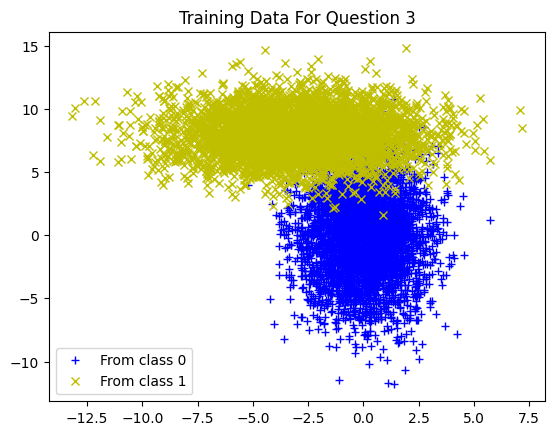

In [81]:
x_from_0_train = training_X[training_y==0]
x_from_1_train = training_X[training_y==1]

plt.plot(x_from_0_train.T[0], x_from_0_train.T[1], "b+", label="From class 0")
plt.plot(x_from_1_train.T[0], x_from_1_train.T[1], "yx", label="From class 1")
plt.title("Training Data For Question 3")
plt.legend()
#problem 3 end

In [82]:
#problem 4 start
ourTree = sp.spatial.cKDTree(training_X)
y_pred_indicies = np.array(ourTree.query(test_X), dtype=np.intc)[1]

y_pred_2 = np.zeros(y_pred_indicies.size)
for i in range(y_pred_indicies.size):
  index = y_pred_indicies[i]
  y_pred_2[i] = training_y[index]

correct = (test_y==y_pred_2)
accuracy_2 = y_pred_2[correct].size/y_pred_2.size
print("Our classifier is " + str(accuracy_2*100) + "% accurate")

Our classifier is 93.09887193098872% accurate


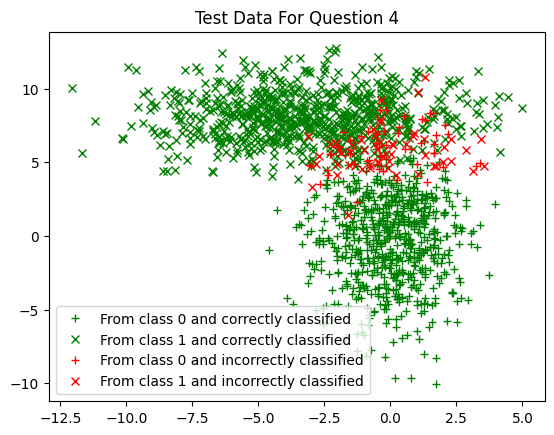

In [83]:
is_0 = (test_y==0)
is_1 = (test_y==1)
is_true = (test_y==y_pred_2)
is_false = (test_y!=y_pred_2)

mk_1 = np.logical_and(is_0, is_true)
mk_2 = np.logical_and(is_1, is_true)
mk_3 = np.logical_and(is_0, is_false)
mk_4 = np.logical_and(is_1, is_false)

x_from_0_correct = test_X[mk_1]
x_from_1_correct = test_X[mk_2]
x_from_0_incorrect = test_X[mk_3]
x_from_1_incorrect = test_X[mk_4]

plt.plot(x_from_0_correct.T[0], x_from_0_correct.T[1], "g+", label="From class 0 and correctly classified")
plt.plot(x_from_1_correct.T[0], x_from_1_correct.T[1], "gx", label="From class 1 and correctly classified")
plt.plot(x_from_0_incorrect.T[0], x_from_0_incorrect.T[1], "r+", label="From class 0 and incorrectly classified")
plt.plot(x_from_1_incorrect.T[0], x_from_1_incorrect.T[1], "rx", label="From class 1 and incorrectly classified")
plt.title("Test Data For Question 4")
plt.legend()

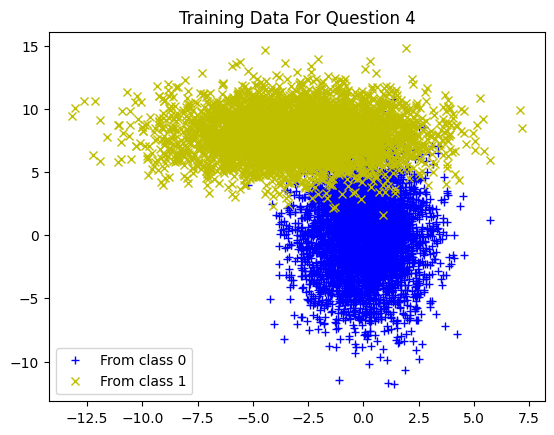

In [84]:
x_from_0_train = training_X[training_y==0]
x_from_1_train = training_X[training_y==1]

plt.plot(x_from_0_train.T[0], x_from_0_train.T[1], "b+", label="From class 0")
plt.plot(x_from_1_train.T[0], x_from_1_train.T[1], "yx", label="From class 1")
plt.title("Training Data For Question 4")
plt.legend()
#problem 4 end

<ipython-input-85-946447e155a7>:31: RuntimeWarning: covariance is not positive-semidefinite.
  x_6 = np.random.multivariate_normal(mean_6, cov_6, 1000)


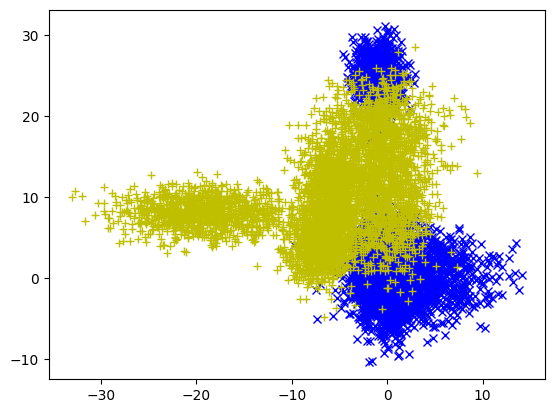

In [85]:
#problem 5 start

#creating the more complex data to use the linear classifer and kd tree on
mean_0 = [0,0]
cov_0 = [[2, 0], [0, 10]]
mean_1 = [3, 0]
cov_1 = [[14, 0],[0, 7]]
mean_2 = [0,1]
cov_2 = [[3, 0], [0, 9]]
mean_3 = [.5, .3]
cov_3 = [[2.7, 0],[0, 8]]
mean_4 = [-1,25]
cov_4 = [[1.4, 0], [0, 4]]
mean_5 = [-6,11]
cov_5 = [[2, 0], [0, 7]]
mean_6 = [-19, 8]
cov_6 = [[-19, 0],[0, 3]]
mean_7 = [0,9]
cov_7 = [[5, 0], [0, 15]]
mean_8 = [-7, 4]
cov_8 = [[3, 0],[0, 5]]
mean_9 = [-1,18]
cov_9 = [[9, 0], [0, 10]]

x_0 = np.random.multivariate_normal(mean_0, cov_0, 1000)
x_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)
x_2 = np.random.multivariate_normal(mean_2, cov_2, 1000)
x_3 = np.random.multivariate_normal(mean_3, cov_3, 1000)
x_4 = np.random.multivariate_normal(mean_4, cov_4, 1000)
x_5 = np.random.multivariate_normal(mean_5, cov_5, 1000)
x_6 = np.random.multivariate_normal(mean_6, cov_6, 1000)
x_7 = np.random.multivariate_normal(mean_7, cov_7, 1000)
x_8 = np.random.multivariate_normal(mean_8, cov_8, 1000)
x_9 = np.random.multivariate_normal(mean_9, cov_9, 1000)

X2 = np.zeros((10000,2))
y2 = np.zeros(10000)
np.concatenate((x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9), out=X2)
y2[5000:10000]=1

mk = np.random.choice((0,1), 10000, True, (.85, .15))
mk_1 = (mk==0)
mk_2 = (mk==1)

training_X2 = X2[mk_1]
training_y2 = y2[mk_1]
test_X2 = X2[mk_2]
test_y2 = y2[mk_2]


plt.plot(x_0.T[0], x_0.T[1], "bx")
plt.plot(x_1.T[0], x_1.T[1], "bx")
plt.plot(x_2.T[0], x_2.T[1], "bx")
plt.plot(x_3.T[0], x_3.T[1], "bx")
plt.plot(x_4.T[0], x_4.T[1], "bx")
plt.plot(x_5.T[0], x_5.T[1], "y+")
plt.plot(x_6.T[0], x_6.T[1], "y+")
plt.plot(x_7.T[0], x_7.T[1], "y+")
plt.plot(x_8.T[0], x_8.T[1], "y+")
plt.plot(x_9.T[0], x_9.T[1], "y+")
plt.show()


In [86]:
#doing linear classification with the new data

inverse = np.linalg.inv(training_X2.T.dot(training_X2))
times_transpose = inverse.dot(training_X2.T)

beta = times_transpose.dot(training_y2)

mk = (test_X2.dot(beta)>=.5)
y_pred3 = np.zeros(test_y2.size)
y_pred3[mk.T] = 1 #in the second group if xBeta>=.5

correct = (test_y2==y_pred3)
accuracy3 = y_pred3[correct].size/y_pred3.size
print("Our classifier is " + str(accuracy3*100) + "% accurate")

Our classifier is 67.92079207920793% accurate


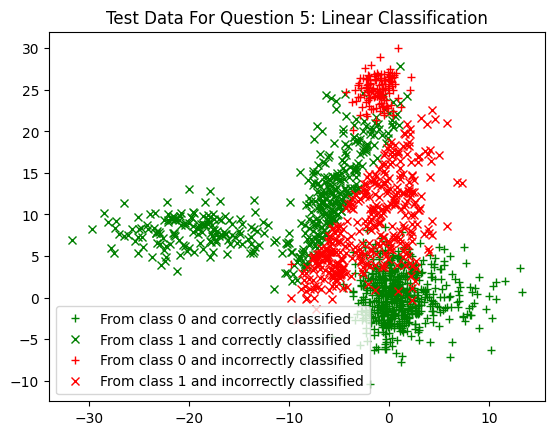

In [87]:
#graphing the linear classification results with new data
is_0 = (test_y2==0)
is_1 = (test_y2==1)
is_true = (test_y2==y_pred3)
is_false = (test_y2!=y_pred3)

mk_1 = np.logical_and(is_0, is_true)
mk_2 = np.logical_and(is_1, is_true)
mk_3 = np.logical_and(is_0, is_false)
mk_4 = np.logical_and(is_1, is_false)

x_from_0_correct = test_X2[mk_1]
x_from_1_correct = test_X2[mk_2]
x_from_0_incorrect = test_X2[mk_3]
x_from_1_incorrect = test_X2[mk_4]

plt.plot(x_from_0_correct.T[0], x_from_0_correct.T[1], "g+", label="From class 0 and correctly classified")
plt.plot(x_from_1_correct.T[0], x_from_1_correct.T[1], "gx", label="From class 1 and correctly classified")
plt.plot(x_from_0_incorrect.T[0], x_from_0_incorrect.T[1], "r+", label="From class 0 and incorrectly classified")
plt.plot(x_from_1_incorrect.T[0], x_from_1_incorrect.T[1], "rx", label="From class 1 and incorrectly classified")
plt.title("Test Data For Question 5: Linear Classification")
plt.legend()


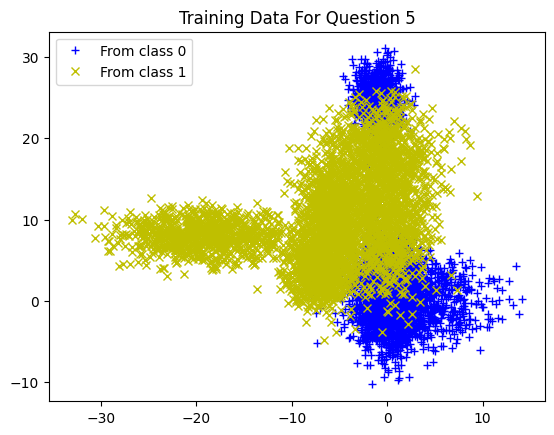

In [88]:
x_from_0_train = training_X2[training_y2==0]
x_from_1_train = training_X2[training_y2==1]

plt.plot(x_from_0_train.T[0], x_from_0_train.T[1], "b+", label="From class 0")
plt.plot(x_from_1_train.T[0], x_from_1_train.T[1], "yx", label="From class 1")
plt.title("Training Data For Question 5")
plt.legend()

In [89]:
#doing nearest neighbor classification with new data
#sometimes I have to reactivate the cell that creates training_X1, etc a second time before this cell works
ourTree2 = sp.spatial.cKDTree(training_X2)
y_pred_indicies2 = np.array(ourTree.query(test_X2, k=1), dtype=np.intc)[1]

y_pred_4 = np.zeros(y_pred_indicies2.size)
for i in range(y_pred_indicies2.size):
  index = y_pred_indicies2[i]
  y_pred_4[i] = training_y2[index]

correct = (test_y2==y_pred_4)
accuracy_4 = y_pred_4[correct].size/y_pred_4.size
print("Our classifier is " + str(accuracy_4*100) + "% accurate")

Our classifier is 85.47854785478548% accurate


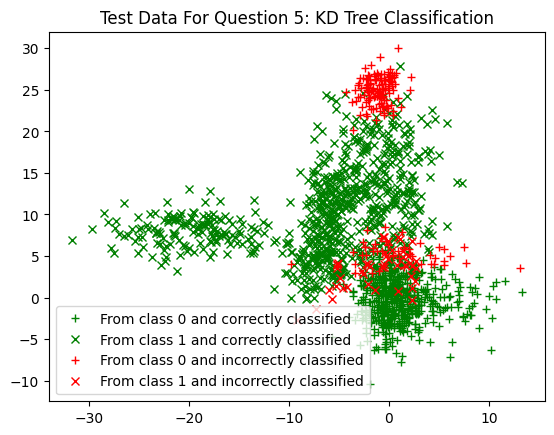

In [90]:
#graphing the nearest neighbor results with new data

is_0 = (test_y2==0)
is_1 = (test_y2==1)
is_true = (test_y2==y_pred_4)
is_false = (test_y2!=y_pred_4)

mk_1 = np.logical_and(is_0, is_true)
mk_2 = np.logical_and(is_1, is_true)
mk_3 = np.logical_and(is_0, is_false)
mk_4 = np.logical_and(is_1, is_false)

x_from_0_correct = test_X2[mk_1]
x_from_1_correct = test_X2[mk_2]
x_from_0_incorrect = test_X2[mk_3]
x_from_1_incorrect = test_X2[mk_4]

plt.plot(x_from_0_correct.T[0], x_from_0_correct.T[1], "g+", label="From class 0 and correctly classified")
plt.plot(x_from_1_correct.T[0], x_from_1_correct.T[1], "gx", label="From class 1 and correctly classified")
plt.plot(x_from_0_incorrect.T[0], x_from_0_incorrect.T[1], "r+", label="From class 0 and incorrectly classified")
plt.plot(x_from_1_incorrect.T[0], x_from_1_incorrect.T[1], "rx", label="From class 1 and incorrectly classified")
plt.title("Test Data For Question 5: KD Tree Classification")
plt.legend()



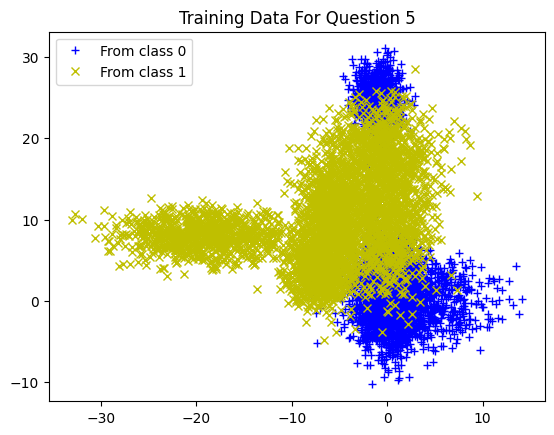

In [91]:
x_from_0_train = training_X2[training_y2==0]
x_from_1_train = training_X2[training_y2==1]

plt.plot(x_from_0_train.T[0], x_from_0_train.T[1], "b+", label="From class 0")
plt.plot(x_from_1_train.T[0], x_from_1_train.T[1], "yx", label="From class 1")
plt.title("Training Data For Question 5")
plt.legend()
#end of question 5